# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data

#Import train data
df_train = pd.read_csv("df_train.csv",index_col=0)
#Import test data
df_test = pd.read_csv("df_test.csv",index_col=0)


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics

# View data
pd.set_option('display.max_columns',None) #Ensures that we areable to view all the columns to allow for better daframe analysis


In [4]:
#view train data
df_train.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [5]:
#view test data
df_test.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [6]:
#view columns in train dataset
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [7]:
#Merging the train and test dataset to make it easier to to clean columns concurrently
df=pd.concat([df_train, df_test])
df.head(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [8]:
#view that shape of the data i.e the number of rows and columns
df.shape

(11683, 48)

In [9]:
#It may also be important to view the bottom of the data 
#in the event that there may be differences with the first few entries of the data
df_train.tail(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,45.000000,1.000000,0.0,sp23,0.0,0.0,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,NaN,285.483333,1024.000000,282.483333,282.483333,802.333333,285.076667,71.333333,282.483333,282.150000,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,85.000000,1.666667,0.0,sp23,0.0,0.0,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,1023.666667,291.816667,291.816667,801.333333,287.673333,40.333333,291.816667,287.816667,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,256.666667,85.000000,3.666667,0.0,sp22,0.0,0.0,1015.666667,0.0,0.1,0.0,0.0,702.333333,801.0,1017.333333,801.666667,1009.666667,291.483333,1021.666667,290.706333,290.706333,601.000000,290.070000,44.666667,290.706333,290.483333,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,250.000000,56.666667,4.333333,0.0,sp23,0.0,0.0,1015.000000,0.0,0.3,0.0,0.0,500.000000,800.0,1020.333333,802.333333,1020.000000,291.483333,1023.000000,290.483333,290.483333,634.166667,290.070000,45.000000,290.483333,288.150000,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000
8762,2017-12-31 21:00:00,4.333333,level_9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,33.333333,156.666667,4.333333,253.333333,0.000000,1.666667,0.0,sp25,0.0,0.0,1016.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1023.666667,801.666667,NaN,289.150000,1027.333333,289.483333,289.483333,801.000000,288.140000,50.000000,289.483333,287.816667,282.150000,287.483333,276.816667,281.020000,287.150000,285.150000,287.483333,281.396667,280.483333,2780.666667


In [10]:
#When we view the dataset for the bottom of the concatinated dataset 
#we will notice that the bottom entries have load shortfall as NAn 
#and this is because in the test dataset the load shortfall is the column we are yet to predict
df.tail(5)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,NaN,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,NaN,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,sp23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,NaN,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [ ]:
# plot relevant feature interactions

In [11]:
# evaluate correlation
#correlation matrix
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,-0.083599,0.245055,0.429858,0.062114,0.112461,0.062032,0.009569,0.004014,0.170672,-0.013045,0.018883,-0.178500,-0.094986,-0.278214,-0.119056,-0.203967,0.027694,-0.153231,0.109921,0.106533,-0.228350,0.059882,-0.293759,0.100117,0.038752,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,-0.020902,0.127963,0.118810,0.060390,0.083222,0.096260,0.051968,0.018764,0.157344,0.003576,0.008780,-0.126045,-0.110104,-0.064473,-0.088641,-0.214059,-0.173351,-0.302455,-0.137050,-0.133444,-0.603190,-0.152139,-0.090703,-0.126690,-0.153656,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,0.350592,-0.057883,0.229440,0.309374,0.027630,0.048719,0.101233,0.044150,0.022129,0.100311,-0.038103,0.052041,-0.103358,-0.041051,-0.128770,-0.065004,-0.074355,-0.037404,-0.143971,0.067461,0.076280,-0.177013,-0.014881,-0.429268,0.082254,-0.035119,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,-0.154620,0.169172,0.347442,-0.205987,-0.045171,0.229563,0.018271,0.017912,0.027446,0.148648,0.008624,0.005728,-0.216339,-0.054883,-0.119706,-0.327958,-0.093324,-0.602483,-0.086149,-0.641650,-0.646328,-0.107606,-0.745160,0.459938,-0.635370,-0.602008,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,-0.116172,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,-0.065749,0.187128,0.498062,-0.121950,-0.049671,0.196892,0.024683,0.020566,0.048725,0.246944,0.009986,0.010059,-0.346911,-0.067316,-0.098388,-0.286516,-0.170549,-0.610552,-0.100597,-0.702760,-0.699706,-0.140293,-0.741594,0.383107,-0.681341,-0.686650,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,0.225566,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,0.081249,-0.056930,0.090741,0.062569,0.053865,0.030161,0.070549,0.032980,0.008520,0.079419,-0.035891,0.021423,-0.073259,-0.120654,0.002846,-0.029508,-0.097868,-0.103973,-0.131503,-0.011646,-0.013887,-0.526723,-0.102323,-0.119219,-0.016264,-0.043627,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.382617,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,0.268904,-0.018832,0.240763,0.234165,-0.030182,0.081858,-0.004587,0.006825,-0.026257,0.113866,-0.038457,-0.007983,-0.116663,-0.009093,-0.161059,-0.081810,0.013334,0.057233,0.060654,0.074952,0.080772,-0.029676,0.054443,-0.288651,0.084195,-0.000745,0.015822,0.008407,0.098830,0.131612,0.016688,0.166347,0.047191,0.019764,0.006009,-0.081602
Seville_clouds_all,0.185177,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,0.111393,-0.

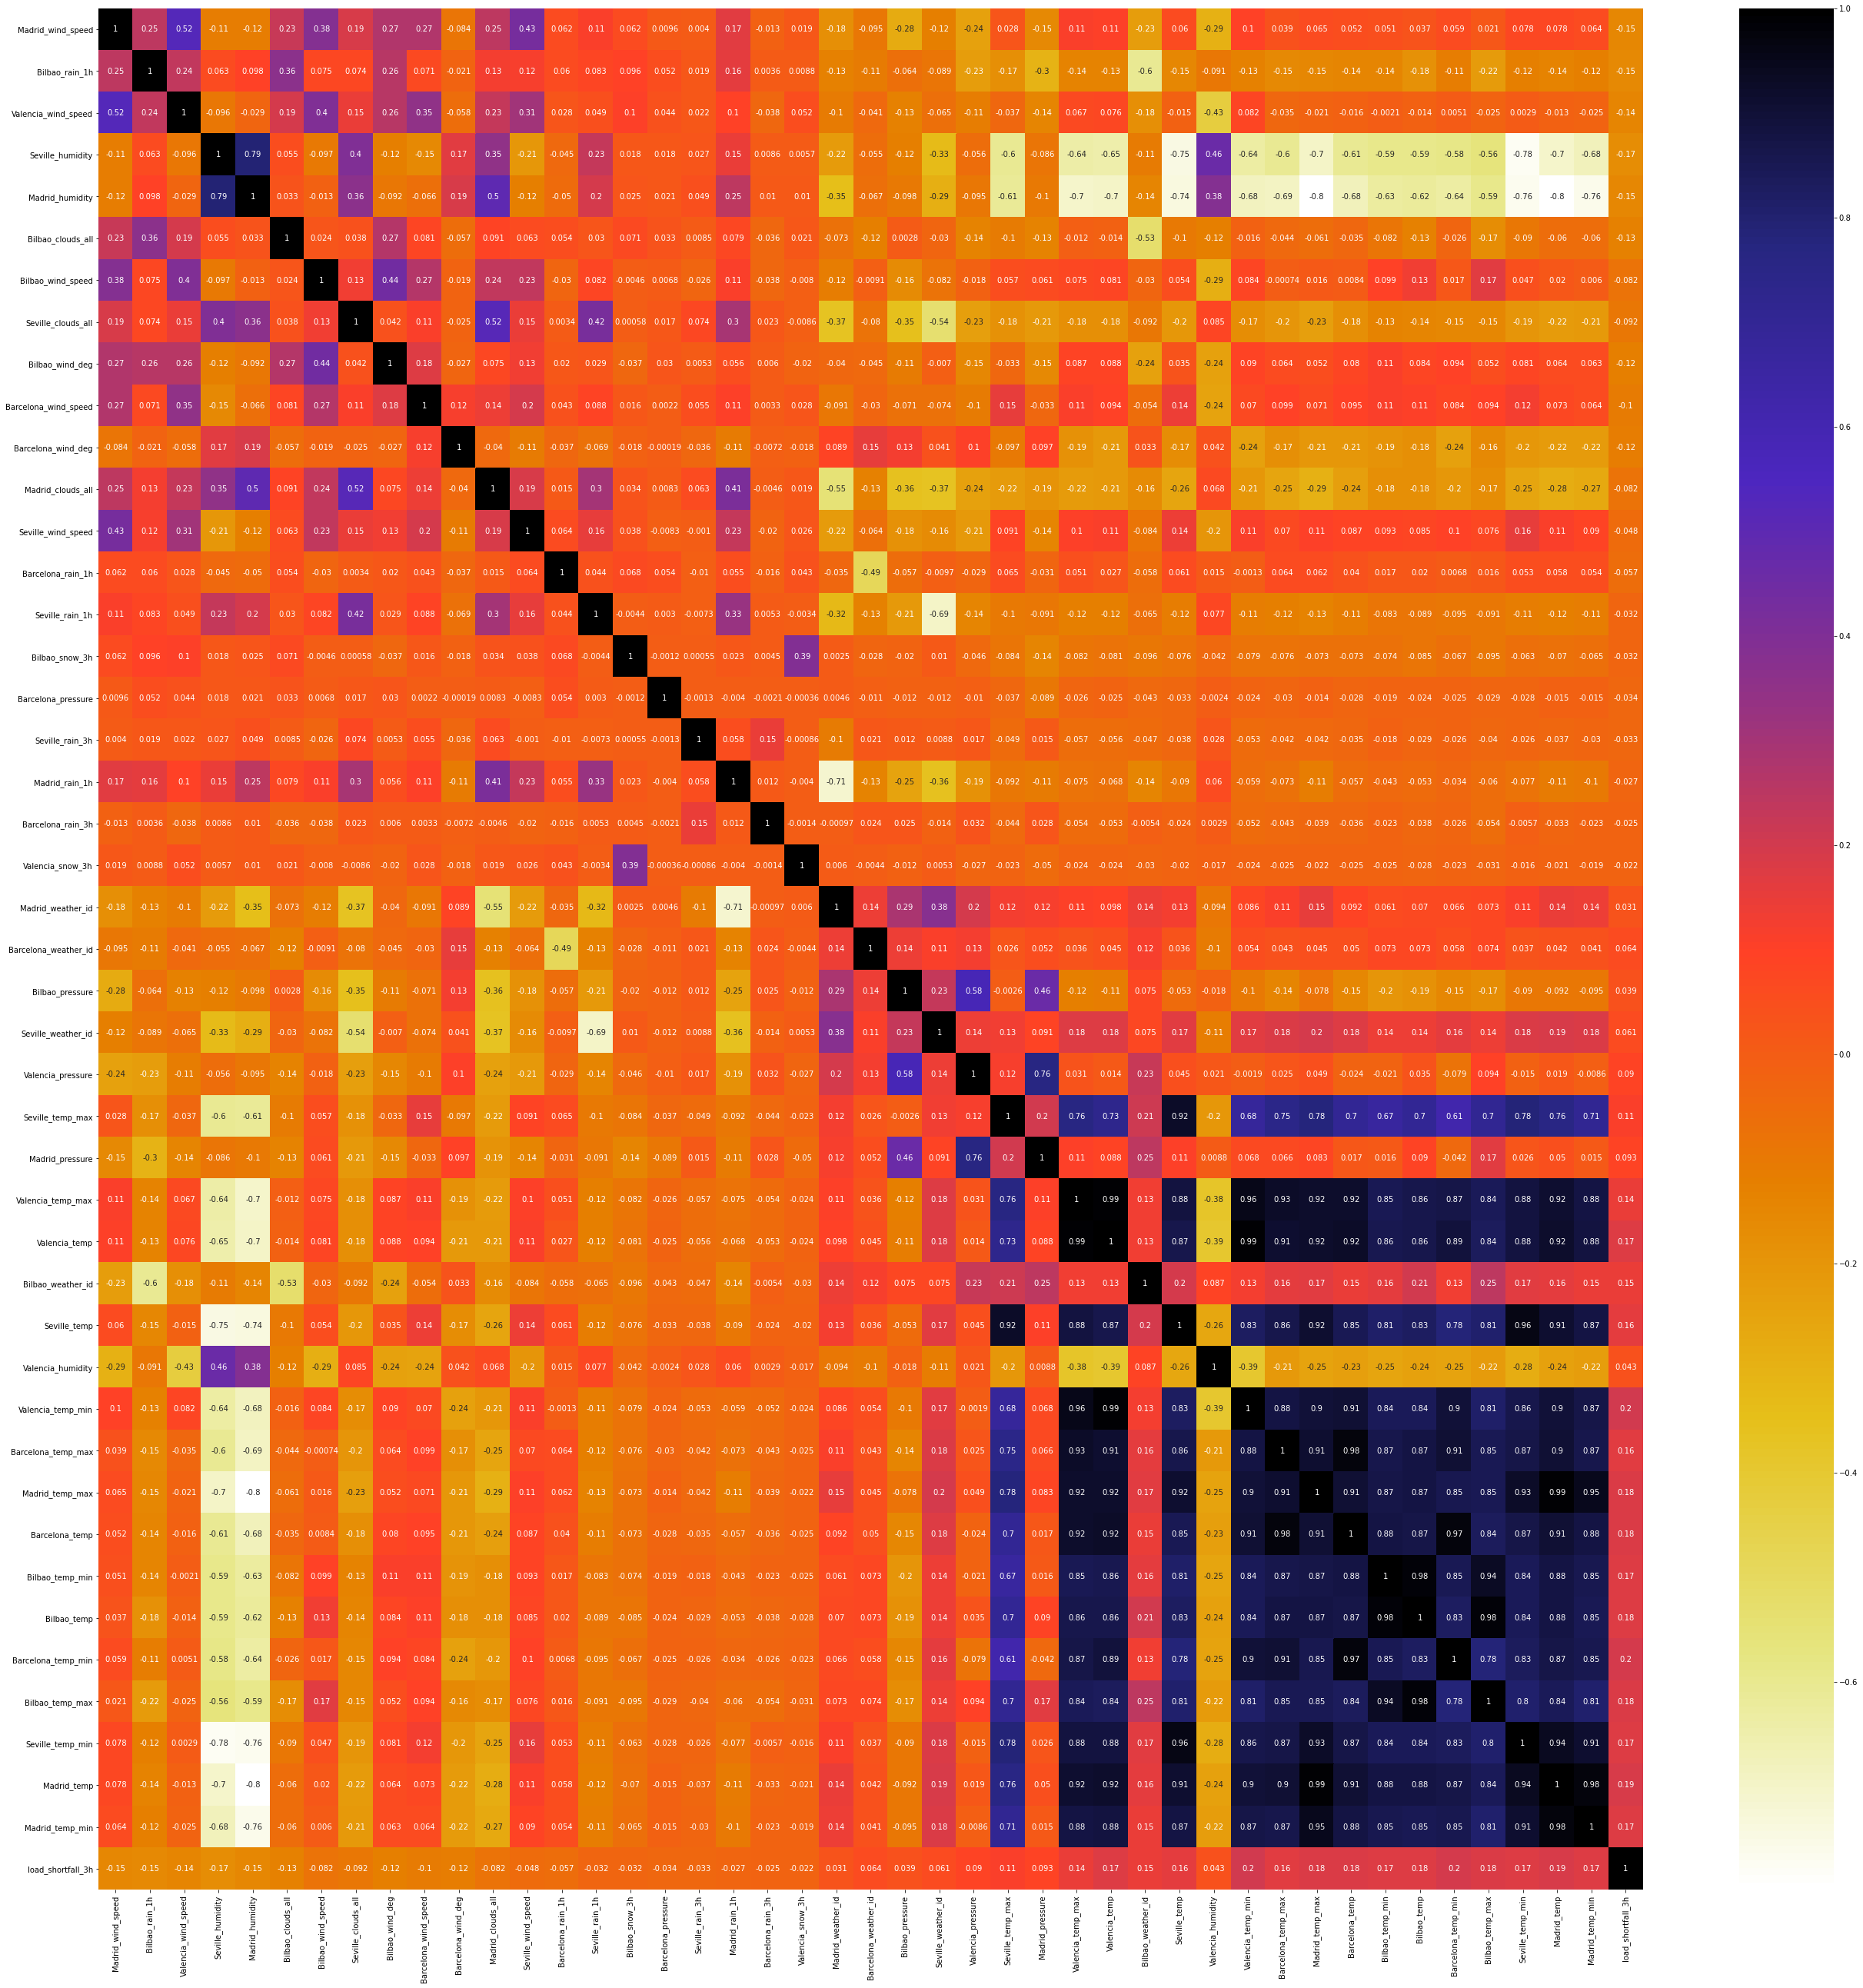

In [29]:
#correlation heatmap to check for multicollinierity among columns
plt.figure(figsize=(45,45))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
#detecting multicollinierity with OLS model

from statsmodels.formula.api import ols
#Model DataFrame with all of the columns:
dfm = df_clean.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Time_day + Time_month + Time_hour + Time_year + Seville_pressure + Valencia_wind_deg


In [27]:
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     38.32
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:54:08   Log-Likelihood:                -86573.
No. Observations:                8763   AIC:                         1.732e+05
Df Residuals:                    8712   BIC:                         1.736e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.329e+05 

In [28]:
#checking highly positive correlated variables so that we can drop some
#This function loops through the whole correlation matrix

def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [29]:
#checking data that fits our threshold
corr_features=correlation(df,0.8)
len(set(corr_features))

#display the list of features with mutlicolinierity
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [30]:
# Lets take a new subset of our potential independent variables
X_remove = ['Barcelona_temp_min','Barcelona_temp_max','Bilbao_temp_max','Madrid_temp_min','Madrid_temp_max','Seville_temp_min','Valencia_temp_min']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Madrid_temp + Time_day + Time_month + Time_hour + Time_year + Seville_pressure + Valencia_wind_deg


In [35]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     37.76
Date:                Thu, 04 Nov 2021   Prob (F-statistic):          7.37e-261
Time:                        09:44:48   Log-Likelihood:                -86760.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8723   BIC:                         1.739e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.779e+04 

In [ ]:
#Explain OLS findings that show us that taking a linear model will not sufficiently explain our target variable

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [18]:
# remove missing values/ features

#check the percetage of the columns with missing values
#opted for this method because it not only shows missing values but 
#also tells us what percentage of th data in those columns is missing to help us decide whether to drop the column or impute the data
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+'%'

time                      0.0%
Madrid_wind_speed         0.0%
Valencia_wind_deg         0.0%
Bilbao_rain_1h            0.0%
Valencia_wind_speed       0.0%
Seville_humidity          0.0%
Madrid_humidity           0.0%
Bilbao_clouds_all         0.0%
Bilbao_wind_speed         0.0%
Seville_clouds_all        0.0%
Bilbao_wind_deg           0.0%
Barcelona_wind_speed      0.0%
Barcelona_wind_deg        0.0%
Madrid_clouds_all         0.0%
Seville_wind_speed        0.0%
Barcelona_rain_1h         0.0%
Seville_pressure          0.0%
Seville_rain_1h           0.0%
Bilbao_snow_3h            0.0%
Barcelona_pressure        0.0%
Seville_rain_3h           0.0%
Madrid_rain_1h            0.0%
Barcelona_rain_3h         0.0%
Valencia_snow_3h          0.0%
Madrid_weather_id         0.0%
Barcelona_weather_id      0.0%
Bilbao_pressure           0.0%
Seville_weather_id        0.0%
Valencia_pressure       21.59%
Seville_temp_max          0.0%
Madrid_pressure           0.0%
Valencia_temp_max         0.0%
Valencia

<AxesSubplot:xlabel='Valencia_pressure'>

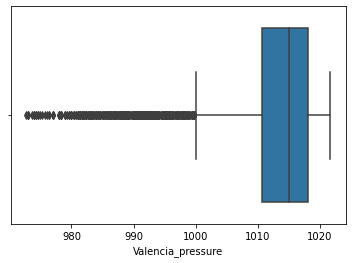

In [12]:
#The Valencia_pressure is found to have less than 25% of the data missing which is too low for us to drop so we should impute to avoide losing valuable data
#Ignore missing values in load shortfall, they come from the test data

#Check how the Valencia Pressure dataset is distributed
sns.boxplot(df['Valencia_pressure'])

In [13]:
#check the measures of central tendancy to see whether they are similar
print('Mode')
print(df['Valencia_pressure'].mode())
print('Mean')
print(df['Valencia_pressure'].mean())
print('Median')
print(df['Valencia_pressure'].median())

#based on the results we see that the values of the mean, mode and meadian are similar 
#and as a result we can impute with any of the values and our data won't be too affected 


Mode
0    1018.0
dtype: float64
Mean
1012.3466870428985
Median
1015.0


In [14]:
#We create a new dataframe so as to not affect our original data
df_clean = df
#In this case we have chosen the mode because based on research pressure is an attribute that tends to repeat itself 
#so intuitevely its safest to choose the most common values
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [15]:
#Check for null values again
#It is important to keep viewing what your data looks like
round((df_clean.isnull().sum()/df_clean.shape[0])*100,2).astype(str)+'%'

time                      0.0%
Madrid_wind_speed         0.0%
Valencia_wind_deg         0.0%
Bilbao_rain_1h            0.0%
Valencia_wind_speed       0.0%
Seville_humidity          0.0%
Madrid_humidity           0.0%
Bilbao_clouds_all         0.0%
Bilbao_wind_speed         0.0%
Seville_clouds_all        0.0%
Bilbao_wind_deg           0.0%
Barcelona_wind_speed      0.0%
Barcelona_wind_deg        0.0%
Madrid_clouds_all         0.0%
Seville_wind_speed        0.0%
Barcelona_rain_1h         0.0%
Seville_pressure          0.0%
Seville_rain_1h           0.0%
Bilbao_snow_3h            0.0%
Barcelona_pressure        0.0%
Seville_rain_3h           0.0%
Madrid_rain_1h            0.0%
Barcelona_rain_3h         0.0%
Valencia_snow_3h          0.0%
Madrid_weather_id         0.0%
Barcelona_weather_id      0.0%
Bilbao_pressure           0.0%
Seville_weather_id        0.0%
Valencia_pressure         0.0%
Seville_temp_max          0.0%
Madrid_pressure           0.0%
Valencia_temp_max         0.0%
Valencia

In [16]:
#Check that all datattype in our dataset are numericals
#We cannot perform regression on values that are non numerical
#We could drop or transform
#We choose to transform data
df_clean.dtypes

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

In [17]:
# create new features

#transform time column to datetime datatype so that it can be usable to our model
df_clean['time'] = pd.to_datetime(df_clean['time'])

#splitting the time variable into day and hr
df_clean['Time_day']=df_clean['time'].dt.day

df_clean['Time_month']=df_clean['time'].dt.month

df_clean['Time_hour']=df_clean['time'].dt.hour

df_clean['Time_year']=df_clean['time'].dt.year


In [18]:
df_clean = df_clean.drop(['time'], axis = 1)

In [19]:
# engineer existing features

#converting Seville pressure to float
#removing the sp in the seville pressure column
df_clean["sp"]=df_clean["Seville_pressure"].str.replace("sp", "")
df_clean['sp'] = pd.to_numeric(df_clean['sp'])

#drop old column and rename new column
df_clean.drop(["Seville_pressure"],axis=1,inplace=True)
#rename new column and view new table
df_clean.rename({'sp': 'Seville_pressure'}, axis=1, inplace=True)


In [20]:
#converting Valencia_wind_deg to Vwd
#removing the sp in the seville pressure column
df_clean["Vwd"]=df["Valencia_wind_deg"].str.replace("level_", "")
df_clean['Vwd'] = pd.to_numeric(df_clean['Vwd'])

#drop old column and rename new column
df_clean.drop(["Valencia_wind_deg"],axis=1,inplace=True)

#rename new column and view new table
df_clean.rename({'Vwd': 'Valencia_wind_deg'}, axis=1, inplace=True)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [21]:
## Bring all imports in notebook to here with comments to indicate the different 
## accuracy packages
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *


In [44]:
# create targets and features dataset

y = df_clean[:len(df_train)][['load_shortfall_3h']]

x = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)

#To be used later
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [45]:
#view x
x.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Time_day,Time_month,Time_hour,Time_year,Seville_pressure,Valencia_wind_deg
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1,1,3,2015,25,5
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1,1,6,2015,25,10
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1,1,9,2015,25,9
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1,1,12,2015,25,8
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1,1,15,2015,25,7


In [46]:
#view y
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [47]:
# split data into validation and training data
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2) 


In [48]:
# Get training and testing data for correlation threshold model
X_corr_train = x_train[X_corr_names]
X_corr_test = x_test[X_corr_names]

In [49]:
# create one or more ML models


In [50]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_corr_train,y_train)
    print('Training score : {}'.format(model.score(X_corr_train,y_train)))
    y_prediction=model.predict(X_corr_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('E:\End-2-end Projects\load_shortfall_3h/model.pkl','wb')
        pickle.dump(model,file)

In [51]:
#Make prediction
from sklearn.ensemble import RandomForestRegressor

preds=predict(RandomForestRegressor(n_estimators=100,random_state=0),0)

Training score : 0.9497792279505418
predictions are: 
 [ 6541.69       11187.61666667  7024.74333333 ...  3523.51666667
 10509.3        13267.87666667]


r2 score: 0.6481027104961135
MAE: 2402.446535938391
MSE: 9327655.869992856
RMSE: 3054.1211288999093


ValueError: Unable to coerce to Series, length must be 1: given 1753

Training score : 0.16865014097530184
predictions are: 
 [[ 8352.68628088]
 [12435.89889576]
 [11794.29979028]
 ...
 [ 9106.77382265]
 [11960.62938639]
 [10845.51362926]]


r2 score: 0.17501004543834575
MAE: 3715.1759805791085
MSE: 21867808.084572252
RMSE: 4676.302822163279


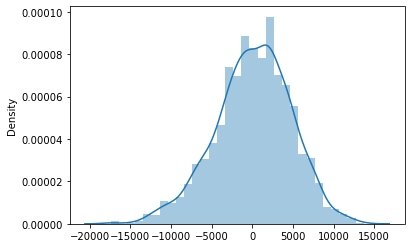

In [52]:

from sklearn.linear_model import LinearRegression
predict(LinearRegression(),0)

In [53]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),0)

Training score : 1.0
predictions are: 
 [ 7906.66666667 12310.66666667  7336.33333333 ...   494.
  7870.          6094.33333333]


r2 score: 0.22901725127969208
MAE: 3403.4440482981563
MSE: 20436252.214113116
RMSE: 4520.647322465347


ValueError: Unable to coerce to Series, length must be 1: given 1753

In [54]:
# evaluate one or more ML models

#base model
#function to calculate the RMSE formy model


In [55]:
#importing r square metric
#from sklearn.metrics import r2_score

In [56]:
#calculating the r square to check model accuracy
#r2_score(y_test, preds)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [37]:
# Compare model performance


In [38]:
# Choose best model and motivate why it is the best choice



In [39]:
###submit modelto Kaggle



In [40]:
#train model on train data




In [ ]:
#predict target variable for test data
#preds = regressor.predict(x_test)

In [42]:
#create csv with time column and predictions

#df_final = pd.DataFrame(preds, columns=['load_shortfall_3h'], index=df_test['time'])
#df_final.index.name = 'time'

In [43]:
#print sumbmission dataframe
#df_final.to_csv("submission.csv")

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic